In [14]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                               zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

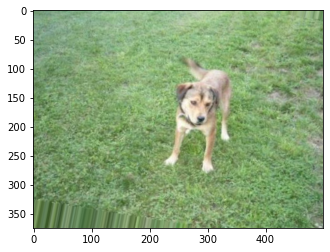

In [3]:
import cv2
import matplotlib.pyplot as plt
dog = cv2.imread('CATS_DOGS/train/DOG/34.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)
plt.imshow(image_gen.random_transform(dog))

In [4]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [6]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
train_img_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                             batch_size=16,
                                             target_size=(150,150),
                                             class_mode='binary')

Found 18743 images belonging to 2 classes.


In [8]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [9]:
test_img_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                             batch_size=16,
                                             target_size=(150,150),
                                             class_mode='binary')

Found 6251 images belonging to 2 classes.


In [10]:
result = model.fit_generator(train_img_gen,epochs=100,steps_per_epoch=150,validation_data=test_img_gen,verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
150/150 - 164s - loss: 0.6988 - accuracy: 0.5182 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 2/100
150/150 - 108s - loss: 0.6924 - accuracy: 0.5113 - val_loss: 0.6920 - val_accuracy: 0.4998
Epoch 3/100
150/150 - 2578s - loss: 0.6886 - accuracy: 0.5387 - val_loss: 0.6839 - val_accuracy: 0.5558
Epoch 4/100
150/150 - 99s - loss: 0.6861 - accuracy: 0.5575 - val_loss: 0.6815 - val_accuracy: 0.5631
Epoch 5/100
150/150 - 139s - loss: 0.6832 - accuracy: 0.5600 - val_loss: 0.6938 - val_accuracy: 0.5074
Epoch 6/100
150/150 - 140s - loss: 0.6828 - accuracy: 0.5533 - val_loss: 0.6736 - val_accuracy: 0.5740
Epoch 7/100
150/150 - 214s - loss: 0.6784 - accuracy: 0.5809 - val_loss: 0.6770 - val_accuracy: 0.5652
Epoch 8/100
150/150 - 173s - loss: 0.6759 - accuracy: 0.5730 - val_loss: 0.6751 - val_accuracy: 0.5743
Epoch 9/100
150/150 - 137s - loss: 0.6737 - accuracy: 0.5783 - val_loss: 0.6758 - val_accuracy: 0.57

Epoch 78/100
150/150 - 94s - loss: 0.4403 - accuracy: 0.7984 - val_loss: 0.4475 - val_accuracy: 0.7876
Epoch 79/100
150/150 - 95s - loss: 0.4435 - accuracy: 0.7912 - val_loss: 0.4770 - val_accuracy: 0.7738
Epoch 80/100
150/150 - 91s - loss: 0.4537 - accuracy: 0.7838 - val_loss: 0.4238 - val_accuracy: 0.8048
Epoch 81/100
150/150 - 93s - loss: 0.4353 - accuracy: 0.7950 - val_loss: 0.4226 - val_accuracy: 0.8052
Epoch 82/100
150/150 - 91s - loss: 0.4478 - accuracy: 0.7996 - val_loss: 0.4272 - val_accuracy: 0.8085
Epoch 83/100
150/150 - 95s - loss: 0.4517 - accuracy: 0.7925 - val_loss: 0.4340 - val_accuracy: 0.8012
Epoch 84/100
150/150 - 94s - loss: 0.4496 - accuracy: 0.7892 - val_loss: 0.4366 - val_accuracy: 0.7962
Epoch 85/100
150/150 - 102s - loss: 0.4310 - accuracy: 0.8042 - val_loss: 0.4511 - val_accuracy: 0.7855
Epoch 86/100
150/150 - 113s - loss: 0.4303 - accuracy: 0.8093 - val_loss: 0.4414 - val_accuracy: 0.7975
Epoch 87/100
150/150 - 118s - loss: 0.4218 - accuracy: 0.8058 - val_los

In [11]:
model.save('Cat_dog.h5')

In [15]:
load_model('Cat_dog.h5')

In [16]:
result.history

{'loss': [0.6988196969032288,
  0.6923602819442749,
  0.6886013150215149,
  0.6861497163772583,
  0.6832258105278015,
  0.6828179955482483,
  0.6783815622329712,
  0.6759493350982666,
  0.6736579537391663,
  0.669773280620575,
  0.6826972961425781,
  0.6729294061660767,
  0.6610642075538635,
  0.6655216813087463,
  0.6499688625335693,
  0.6455585956573486,
  0.6488582491874695,
  0.6385666728019714,
  0.6344442367553711,
  0.6194888949394226,
  0.5979683995246887,
  0.6165862679481506,
  0.5964726209640503,
  0.5847567319869995,
  0.6067720055580139,
  0.5947492122650146,
  0.5541892647743225,
  0.5757825970649719,
  0.5919066071510315,
  0.5723345875740051,
  0.5581743121147156,
  0.5556820034980774,
  0.5540918111801147,
  0.5448631048202515,
  0.5570248961448669,
  0.5539616346359253,
  0.5490657091140747,
  0.5278273820877075,
  0.5390492081642151,
  0.5210472345352173,
  0.5361834168434143,
  0.5256996154785156,
  0.4952043294906616,
  0.5068860650062561,
  0.5173010230064392,
  0

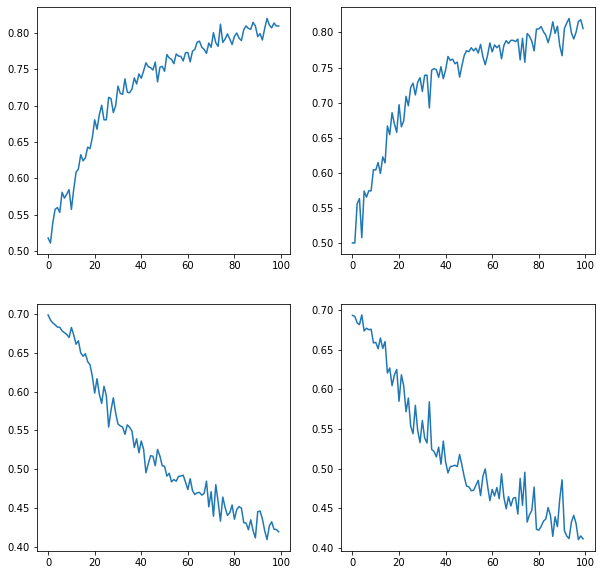

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(result.history['accuracy'])
plt.subplot(222)
plt.plot(result.history['val_accuracy'])
plt.subplot(223)
plt.plot(result.history['loss'])
plt.subplot(224)
plt.plot(result.history['val_loss'])
plt.show()

# Predicting New Image

In [28]:
from tensorflow.keras.preprocessing import image

In [54]:
img = image.load_img("D:/tests/Puppy.jpg",target_size=(150,150))

In [55]:
img = image.img_to_array(img)

In [56]:
img.shape

(150, 150, 3)

In [57]:
img = img.reshape(1,150,150,3)

In [58]:
img.shape

(1, 150, 150, 3)

In [59]:
pred = model.predict(img)

In [60]:
pred

array([[1.]], dtype=float32)

In [78]:
cat = image.load_img("D:/tests/cat2.jpg",target_size=(150,150))

In [79]:
cat = image.img_to_array(cat)

In [80]:
cat.shape

(150, 150, 3)

In [81]:
cat = cat.reshape(1,150,150,3)

In [84]:
pred_cat = model.predict_classes(cat)

In [85]:
pred_cat

array([[0]])

In [86]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}